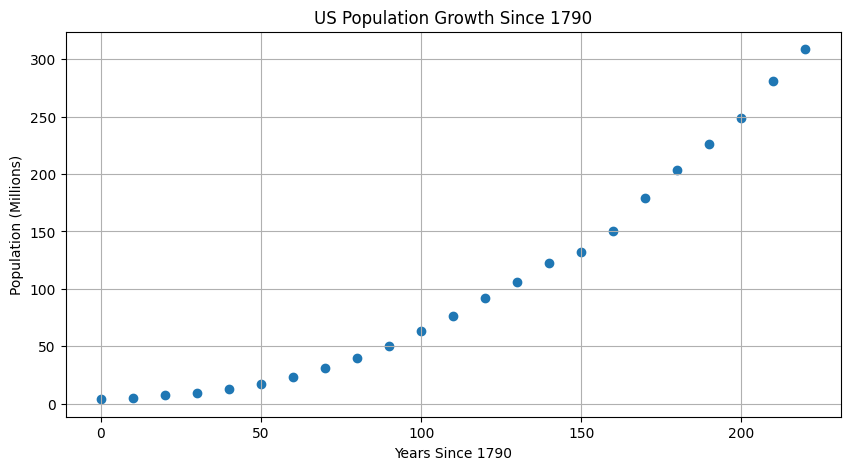

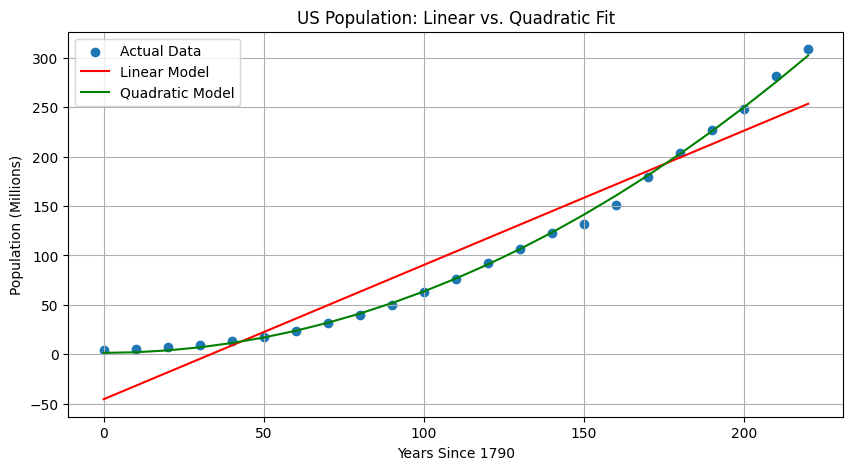

Linear Model R²: 0.9192
Quadratic Model R²: 0.9985


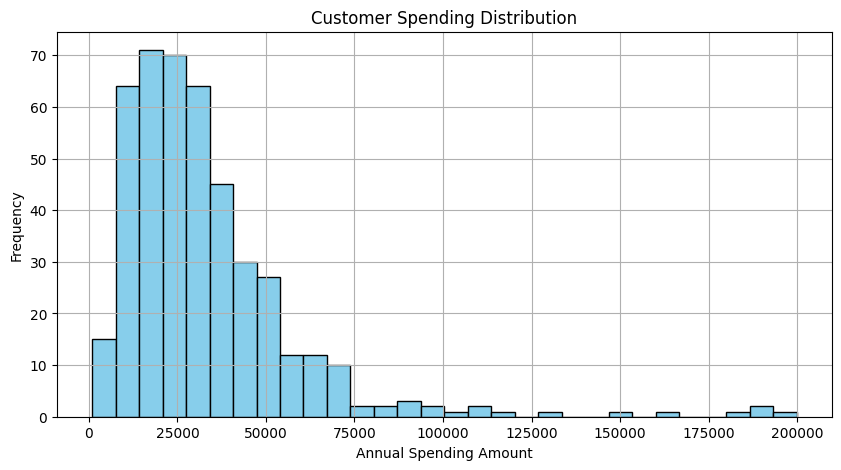

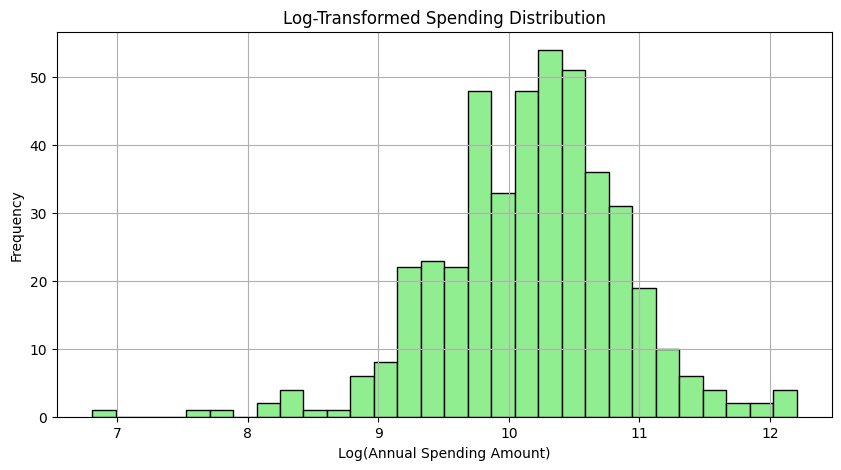

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load US Population Data
us_pop_df = pd.read_csv('us_pop_data.csv')

# Create new columns
us_pop_df['YearsSince1790'] = us_pop_df['year'] - 1790
us_pop_df['PopMillions'] = us_pop_df['us_pop'] / 1_000_000

# Plot US Population vs Years Since 1790
plt.figure(figsize=(10, 5))
plt.scatter(us_pop_df['YearsSince1790'], us_pop_df['PopMillions'])
plt.xlabel('Years Since 1790')
plt.ylabel('Population (Millions)')
plt.title('US Population Growth Since 1790')
plt.grid(True)
plt.show()

# Linear regression model
X = us_pop_df[['YearsSince1790']]
y = us_pop_df['PopMillions']
lin_model = LinearRegression()
lin_model.fit(X, y)
y_pred = lin_model.predict(X)
r2_linear = r2_score(y, y_pred)

# Add squared years column
us_pop_df['YearsSince1790_squared'] = us_pop_df['YearsSince1790'] ** 2

# Quadratic regression model
X2 = us_pop_df[['YearsSince1790_squared']]
quad_model = LinearRegression()
quad_model.fit(X2, y)
y_pred2 = quad_model.predict(X2)
r2_quad = r2_score(y, y_pred2)

# Plot data with both models
plt.figure(figsize=(10, 5))
plt.scatter(us_pop_df['YearsSince1790'], us_pop_df['PopMillions'], label='Actual Data')
plt.plot(us_pop_df['YearsSince1790'], y_pred, color='red', label='Linear Model')
sorted_df = us_pop_df.sort_values('YearsSince1790')
plt.plot(sorted_df['YearsSince1790'], quad_model.predict(sorted_df[['YearsSince1790_squared']]), color='green', label='Quadratic Model')
plt.xlabel('Years Since 1790')
plt.ylabel('Population (Millions)')
plt.title('US Population: Linear vs. Quadratic Fit')
plt.legend()
plt.grid(True)
plt.show()

print(f"Linear Model R²: {r2_linear:.4f}")
print(f"Quadratic Model R²: {r2_quad:.4f}")

# Load Customer Spending Data
spend_df = pd.read_csv('customer_spending.csv')

# Histogram of original spending data
plt.figure(figsize=(10, 5))
plt.hist(spend_df['ann_spending'], bins=30, color='skyblue', edgecolor='black')
plt.title('Customer Spending Distribution')
plt.xlabel('Annual Spending Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Log transformation
spend_df['LogSpending'] = np.log(spend_df['ann_spending'])

# Histogram of log-transformed data
plt.figure(figsize=(10, 5))
plt.hist(spend_df['LogSpending'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Log-Transformed Spending Distribution')
plt.xlabel('Log(Annual Spending Amount)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
